## Text mining for PR

In [48]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import re

## Loading data

In [49]:
mydata = pd.read_excel("Twitter_data.xlsx", index_col = 0)
mydata

,id,author_id,created_at,text,retweet_count,reply_count,like_count,quote_count,username,follower_count,following_count
0,1477769524011315210,826104766161879044,2022-01-02T22:31:24.000Z,@Iovehearts is it a pension scheme with your e...,0,1,0,0,_postpunkdad,674,414
1,1477750903025319937,1433581386112380932,2022-01-02T21:17:25.000Z,@AccidentAlert_K @sikikasafety @road_driving @...,1,0,5,0,Missy41091460,3,29
2,1477743788793778179,1273894620,2022-01-02T20:49:09.000Z,RT @PRSA_Roadsafety: Let be honest PSV drivers...,4,0,0,0,kiela_w,921,782
3,1477740238323789831,19198704,2022-01-02T20:35:02.000Z,"You’ve heard of the “Great Resignation,” but a...",0,0,2,0,PRSASacramento,2405,1522
4,1477737600479866884,948674925950328833,2022-01-02T20:24:33.000Z,@AccidentAlert_K @sikikasafety @road_driving @...,1,0,5,0,EliasZakayo300,400,1640
...,...,...,...,...,...,...,...,...,...,...,...
81,1477119968584126464,18586040,2022-01-01T03:30:18.000Z,[USA] Public Relations Sr. Advisor for Infrast...,0,0,0,0,pr_jobs,5833,3295
82,1477100493830864903,436045478,2022-01-01T02:12:55.000Z,RT @DWJr16: It has been my honor to serve as 2...,1,0,0,0,PRSAHealth,2293,1582
83,1477098881880055814,1049005198860009473,2022-01-01T02:06:31.000Z,It has been my honor to serve as 2021 @PRSAHea...,1,0,4,0,DWJr16,146,1135
84,1477095571777155073,9745402,2022-01-01T01:53:22.000Z,"RT @PRSA: As we close out 2021, we want to tak...",5,0,0,0,alaskaegan,498,437


## Preprocessing

In [50]:
# Lower Transformation
mydata["mytext_new"] = mydata['text'].str.lower()
# Remove URLS
mydata["mytext_new"] = mydata["mytext_new"].str.replace(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', 
                                                        '', flags=re.UNICODE, regex = True) 
# Remove Emoticons
mydata["mytext_new"] = mydata["mytext_new"].str.replace("[^\w\s#@/:%.,_-]", '', flags=re.UNICODE, regex = True) 
mydata["mytext_new"] = mydata["mytext_new"].apply(lambda x: re.split("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", str(x))[0])
# Remove Special characters
mydata["mytext_new"] = mydata['mytext_new'].str.replace('[^A-Za-z\s]+', '', regex = True)

# Remove Stopwords
stop = stopwords.words('english')
pat = r'\b(?:{})\b'.format('|'.join(stop))
mydata["mytext_new"] = mydata["mytext_new"].str.replace(pat, '', regex = True)
mydata["mytext_new"]

0     iovehearts    pension scheme   employer  avc  ...
1     accidentalertk sikikasafety roaddriving ntsake...
2     rt prsaroadsafety let  honest psv drivers    d...
3     youve heard   great resignation    ready    pa...
4     accidentalertk sikikasafety roaddriving ntsake...
                            ...                        
81    usa public relations sr advisor  infrastructur...
82    rt dwjr     honor  serve   prsahealth academy ...
83        honor  serve   prsahealth academy chair\np...
84    rt prsa   close    want  take  opportunity  th...
85    remember  buy  tickets   raffle   win one   th...
Name: mytext_new, Length: 86, dtype: object

## Word Cloud

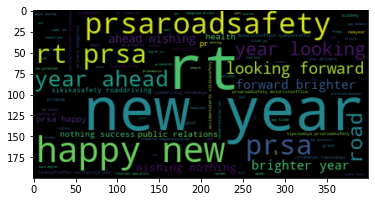

In [51]:
texts = " ".join(text for text in mydata.mytext_new)
wordcloud = WordCloud().generate(texts) # wordcloud object generator
plt.imshow(wordcloud, interpolation='bilinear') # visualization

## Word Frequency

In [9]:
new_df = mydata["mytext_new"].str.split(expand=True).stack().value_counts().reset_index()
new_df.columns = ['Word', 'Frequency'] 
new_df = new_df.sort_values(['Frequency'], ascending=False)
new_df

,Word,Frequency
0,year,37
1,rt,36
2,prsa,35
3,prsaroadsafety,28
4,new,23
...,...,...
276,precious,1
275,publicaffairs,1
274,nhslincsccg,1
273,repercussions,1


## Word Frequency Visuaization

<AxesSubplot:xlabel='Word'>

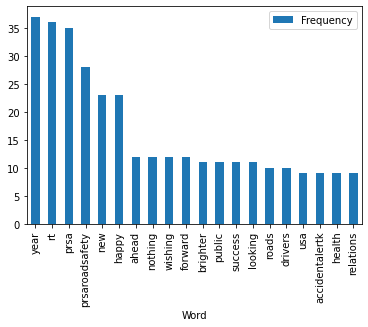

In [10]:
new_df[0:20].plot.bar(x="Word")